<a href="https://colab.research.google.com/github/vijaynadimpalli/PDE-Deep_Learning-vs-FFT/blob/main/FFT_PDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint

from  matplotlib import pyplot as plt
import matplotlib.cm as cm

# FFT on Heat Equation

In [ ]:
a  = 1 # Constant
L = 100 # Length of domain
N = 1000 # Number of points
dx = L/N
x = np.arange(-L/2,L/2,dx) # x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial Conditions
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0) # Fourier transform on initial conditions u0

u0hat_ri = np.concatenate((u0hat.real, u0hat.imag)) # Splitting the real and imaginary parts of u0hat

# Simulate Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)


def rhsHeat(uhat_ri, t, kappa, a):
    '''
    Right hand side of heat equation after fourier transform
    '''
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa,2)) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri


uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a))

uhat = uhat_ri[:, :N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)


for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real

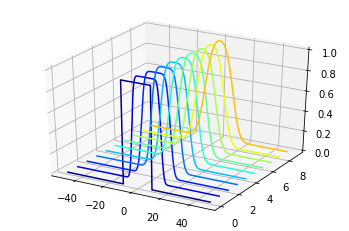

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
plt.set_cmap('jet_r')
u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:],color=cm.jet(j*20))

In [ ]:
uhat_ri.shape

(100, 2000)

# FFT on Burgers equation

u_t + u*u_x = nu * u_xx

In [ ]:
nu = 0.001 # Diffusion constant
L = 20
N = 1000
dx = L/N
x = np.arange(-L/2, L/2, dx)   

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial Condition
u0 = 1/np.cosh(x)

# Simulate PDE in spatial domain
dt = 0.025
t = np.arange(0,100*dt,dt)


def rhsBurgers(u,t,kappa,mu):
    uhat = np.fft.fft(u)
    d_uhat = (1j)*kappa*uhat
    dd_uhat = -np.power(kappa,2)*uhat
    d_u = np.fft.ifft(d_uhat)
    dd_u = np.fft.ifft(dd_uhat)
    du_dt = -u * d_u + nu*dd_u
    return du_dt.real

u = odeint(rhsBurgers, u0, t, args=(kappa,nu))

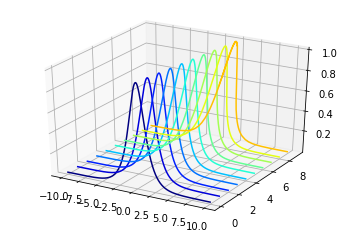

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
plt.set_cmap('jet_r')
u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:],color=cm.jet(j*20))